In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, minmax_scale

In [9]:
x = pd.read_csv('all.csv').fillna(method='bfill')
SP = pd.read_csv('^GSPC.csv')
SP = SP[['Date', 'Close']]
SP.columns = ['Date', 'sp']
x = pd.merge(x, SP, how='left', on='Date')
x.head()

,Date,A,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZBRA,ZION,vix,sp
0,2005-01-03,17.081545,29.033333,1.130179,14.5375,15.01,22.392265,26.370001,30.844999,36.389999,...,29.270000,50.090000,27.820000,44.716732,16.829618,79.379997,55.509998,67.389999,14.08,1202.079956
1,2005-01-04,16.630901,28.840000,1.141786,14.4225,14.98,22.166759,25.750000,30.030001,35.400002,...,28.440001,49.750000,27.594999,44.057972,16.606758,79.349998,54.470001,66.470001,13.98,1188.050049
2,2005-01-05,16.623749,28.893333,1.151786,14.3950,14.69,21.912466,25.650000,29.865000,35.560001,...,27.540001,49.490002,27.270000,43.188408,16.567219,78.730003,52.570000,66.230003,14.09,1183.739990
3,2005-01-06,16.258942,28.866667,1.152679,14.5175,14.52,22.406660,25.420000,29.370001,35.500000,...,27.100000,50.119999,27.400000,43.003952,16.754133,79.639999,52.650002,66.610001,13.58,1187.890015
4,2005-01-07,16.244635,28.700001,1.236607,14.4750,14.29,22.790501,26.610001,29.389999,35.549999,...,27.330000,49.790001,27.190001,42.766796,16.660675,79.500000,53.099998,64.989998,13.49,1186.189941


In [10]:
df_all = x.drop(['Date', 'vix', 'sp'], axis=1)
df = x[['Date', 'vix', 'sp']]
df.index = pd.to_datetime(df.Date)
df = df.drop('Date', axis=1)
scaler = MinMaxScaler()
df.head()

,vix,sp
Date,,
2005-01-03,14.08,1202.079956
2005-01-04,13.98,1188.050049
2005-01-05,14.09,1183.739990
2005-01-06,13.58,1187.890015
2005-01-07,13.49,1186.189941


In [11]:
def precision(list_1, list_2):
    list_1 = np.array(list_1)
    list_2 = np.array(list_2)
    flags = np.equal(list_1, list_2)
    precision = flags.sum() / len(list_2)
    return precision

0.0023923444976076554


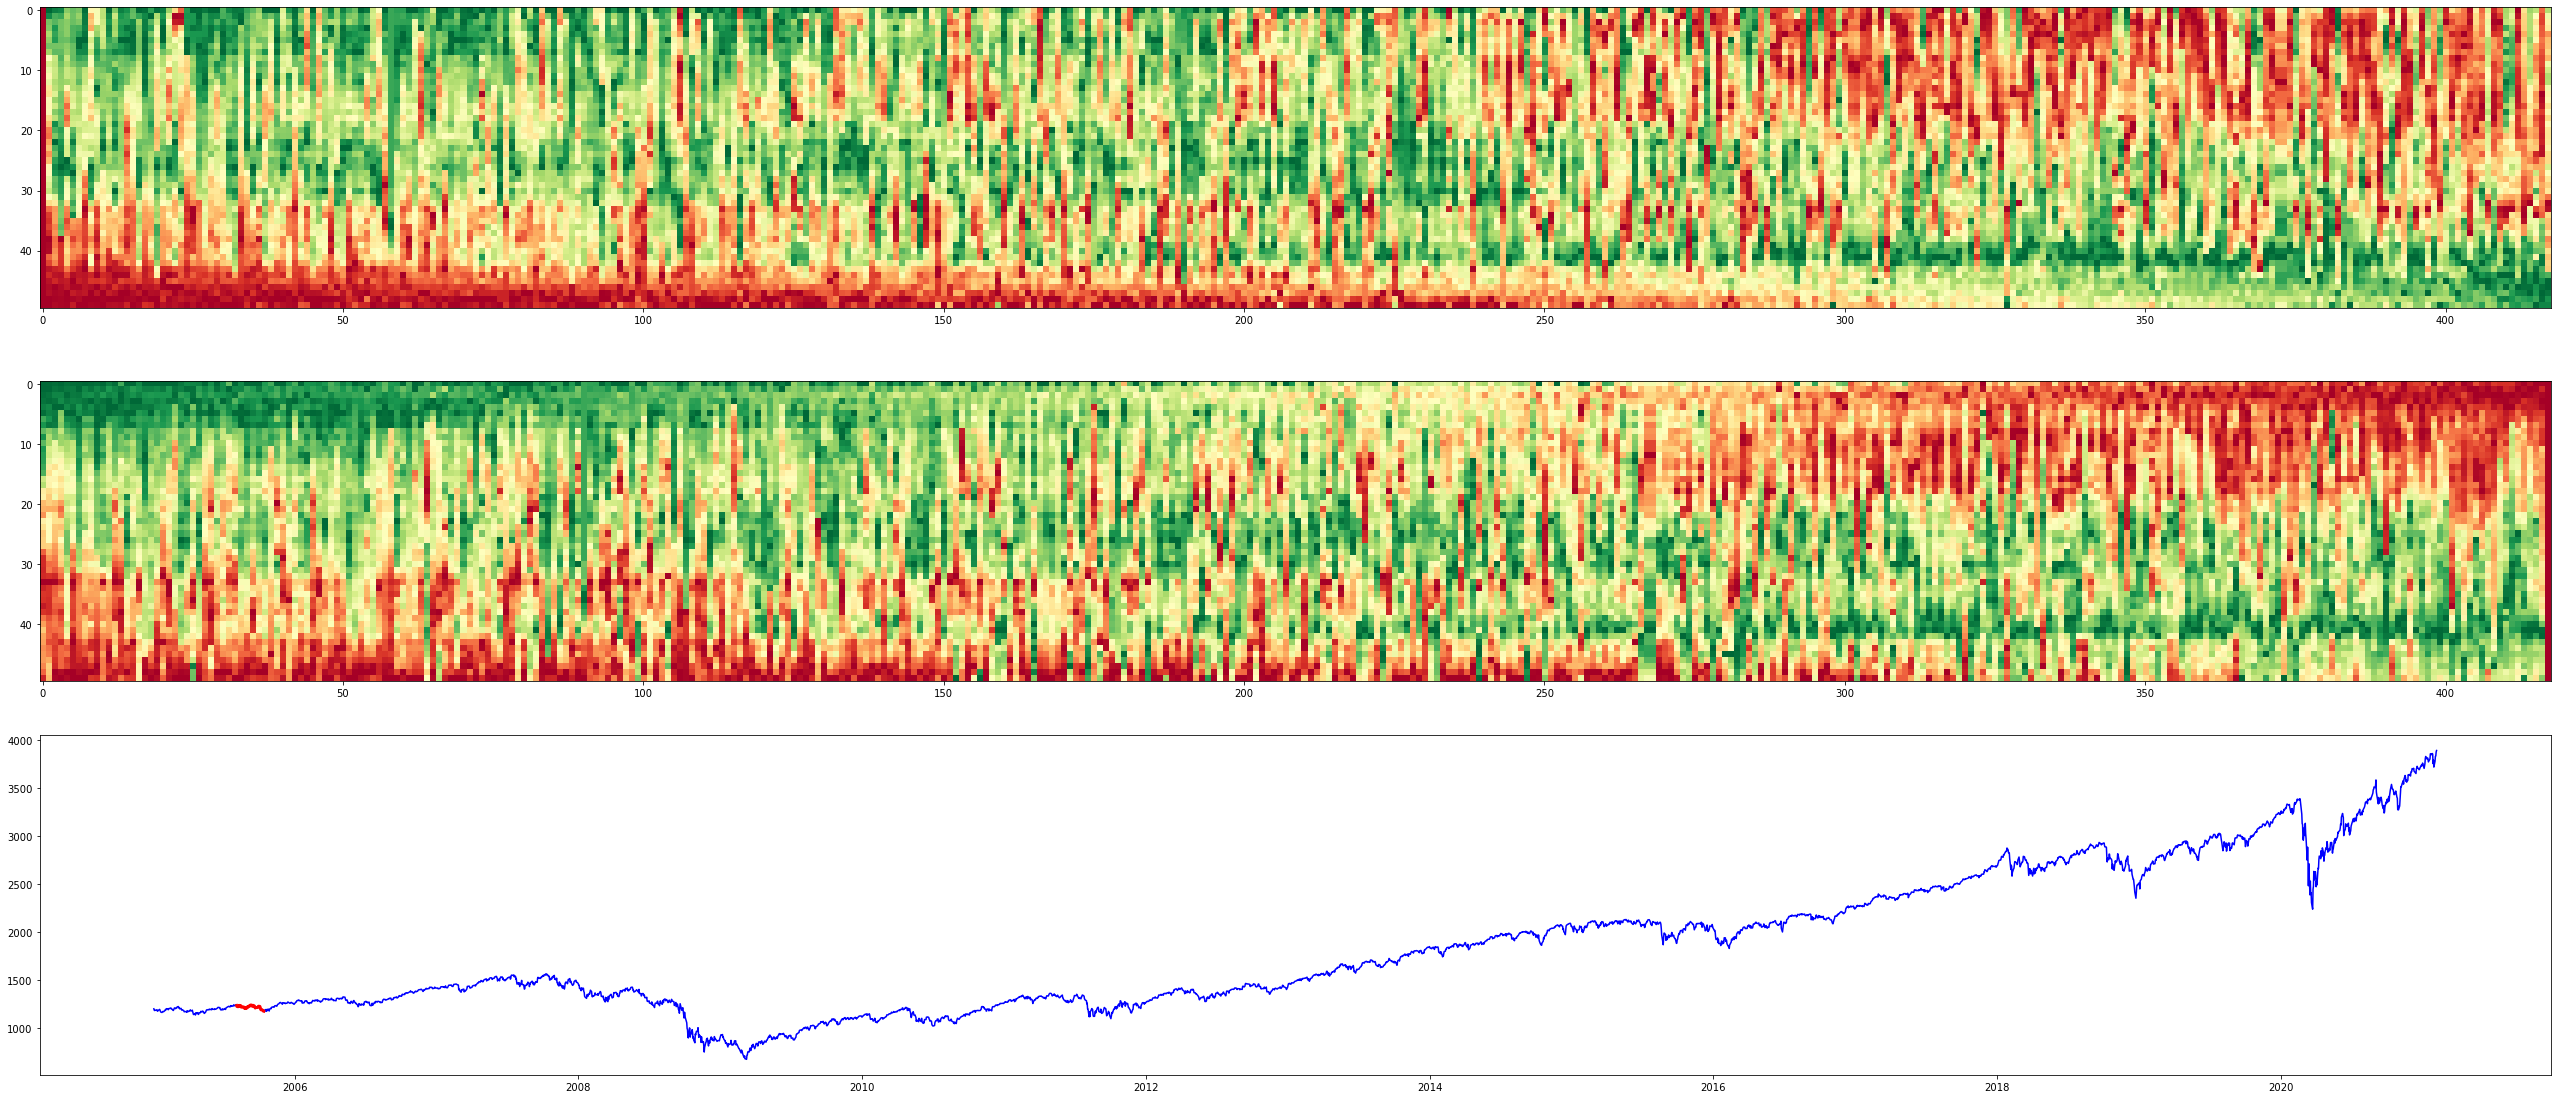

0.004784688995215311


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
win = 50

fig, ax = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(45, 20)
ax0 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
ax1 = plt.subplot2grid((3, 2), (1, 0), colspan=2)
ax2 = plt.subplot2grid((3, 2), (2, 0), colspan=2)
fig.subplots_adjust(hspace=0.1)

for i in (148, 300):    
    ax2.plot(df.sp, color='b')
    ax2.plot(df.sp[i:i+win], color='r', linewidth=3.0)
    
    df_stocks = df_all.iloc[i: i+win]
    df_sc = pd.DataFrame(scaler.fit_transform(df_stocks))
    
    df_sc.loc[420] = df_sc.iloc[-5:].mean(axis=0)
    df0_sc = df_sc.sort_values(by=[420], axis=1)
    df0_sc = df0_sc.drop(420, axis=0)
#     print(df0_sc.columns)
    ax0.imshow(np.array(df0_sc), cmap='RdYlGn')
    
    df_sc.loc[420] = df_sc.iloc[:5].mean(axis=0)
    df1_sc = df_sc.sort_values(by=[420], axis=1, ascending=False)
    df1_sc = df1_sc.drop(420, axis=0)
#     print(df1_sc.columns)
    ax1.imshow(np.array(df1_sc), cmap='RdYlGn')
    
    print(precision(df0_sc.columns, df1_sc.columns))
    
    plt.show()
    plt.clf()

In [13]:
# win = 50

# fig, ax = plt.subplots(nrows=3, ncols=2)
# fig.set_size_inches(45, 20)
# ax0 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
# ax1 = plt.subplot2grid((3, 2), (1, 0), colspan=2)
# ax2 = plt.subplot2grid((3, 2), (2, 0), colspan=2)
# fig.subplots_adjust(hspace=0.1)

# arr = []

# for i in range(0, len(df)):
#     ax2.plot(df.sp, color='b')
#     ax2.plot(df.sp[i:i+win], color='r', linewidth=3.0)
    
#     df_stocks = df_all.iloc[i: i+win]
#     df_sc = pd.DataFrame(scaler.fit_transform(df_stocks))
    
#     df_sc.loc[420] = df_sc.iloc[-5:].mean(axis=0)
#     df0_sc = df_sc.sort_values(by=[420], axis=1)
#     df0_sc = df0_sc.drop(420, axis=0)
#     ax0.imshow(np.array(df0_sc), cmap='RdYlGn')
    
#     df_sc.loc[420] = df_sc.iloc[:5].mean(axis=0)
#     df1_sc = df_sc.sort_values(by=[420], axis=1, ascending=False)
#     df1_sc = df1_sc.drop(420, axis=0)
#     ax1.imshow(np.array(df1_sc), cmap='RdYlGn')
    
#     arr.append(precision(df0_sc.columns, df1_sc.columns))
    
#     plt.savefig('E:/Temp/hist/{:04d}.png'.format(i))
#     plt.clf()
#     plt.close('all')


In [54]:
win = 10
arr = []

for i in range(0, len(df)):    
    df_stocks = df_all.iloc[i: i+win]
    df_sc = pd.DataFrame(scaler.fit_transform(df_stocks))
    
    df_sc.loc[420] = df_sc.iloc[-5:].mean(axis=0)
    df0_sc = df_sc.sort_values(by=[420], axis=1)
    df0_sc = df0_sc.drop(420, axis=0)
    
    df_sc.loc[420] = df_sc.iloc[:5].mean(axis=0)
    df1_sc = df_sc.sort_values(by=[420], axis=1, ascending=False)
    df1_sc = df1_sc.drop(420, axis=0)
    
    arr.append(precision(df0_sc.columns, df1_sc.columns))

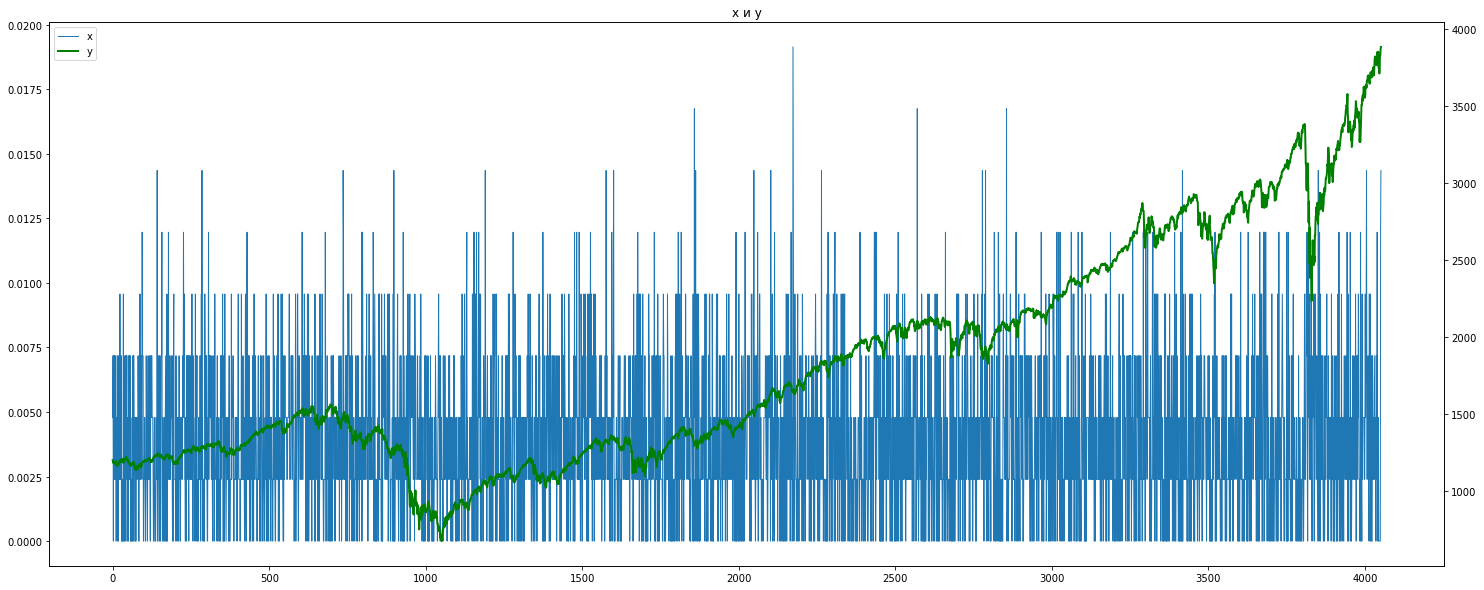

In [55]:
x = pd.Series(arr)
df_ = df.reset_index(drop=True)
x.reset_index(drop=True, inplace=True)
df_ = df_.join(x.rename('0'))

fig, ax = plt.subplots()
ax.set_title('x и y')
fig.set_size_inches(25, 10)

lns1 = ax.plot(df_['0'], linewidth=1, label='x')
ax2 = ax.twinx()
lns2 = ax2.plot(df_.sp, linewidth=2, c='g', label='y')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

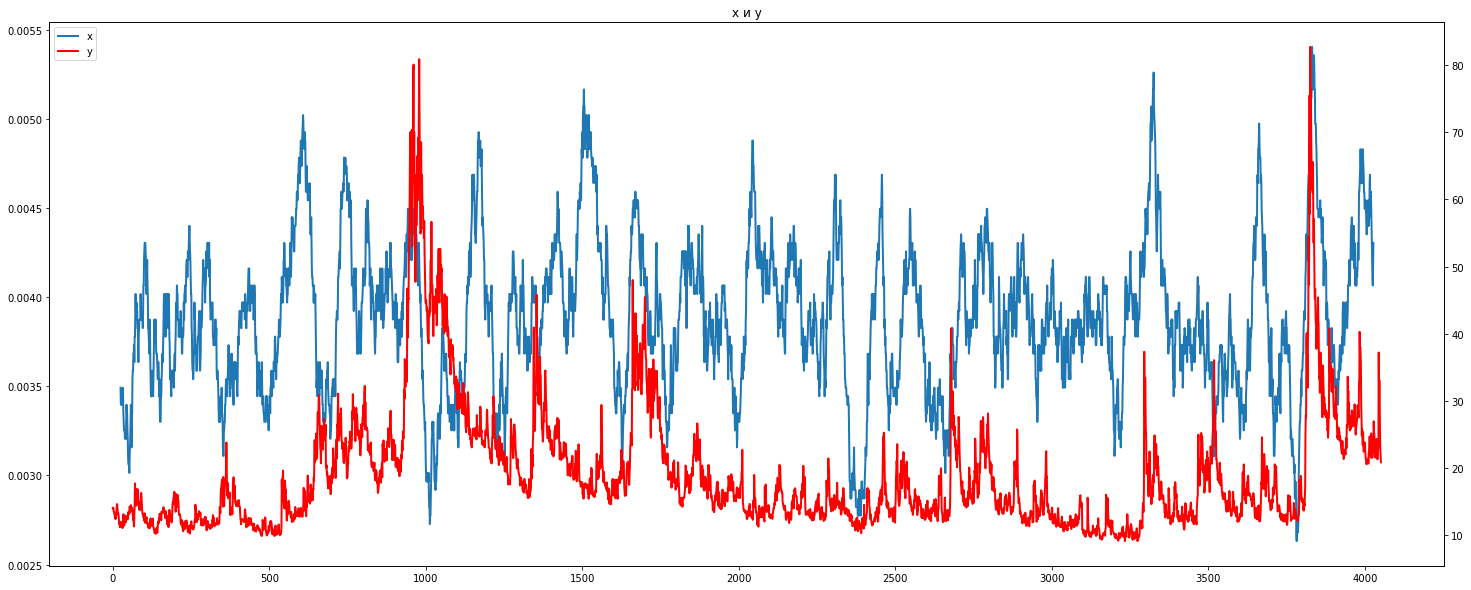

In [56]:
fig, ax = plt.subplots()
ax.set_title('x и y')
fig.set_size_inches(25, 10)

lns1 = ax.plot(df_['0'].rolling(window=50, center=True).mean(), linewidth=2, label='x')
ax2 = ax.twinx()
lns2 = ax2.plot(df_.vix, linewidth=2, c='r', label='y')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

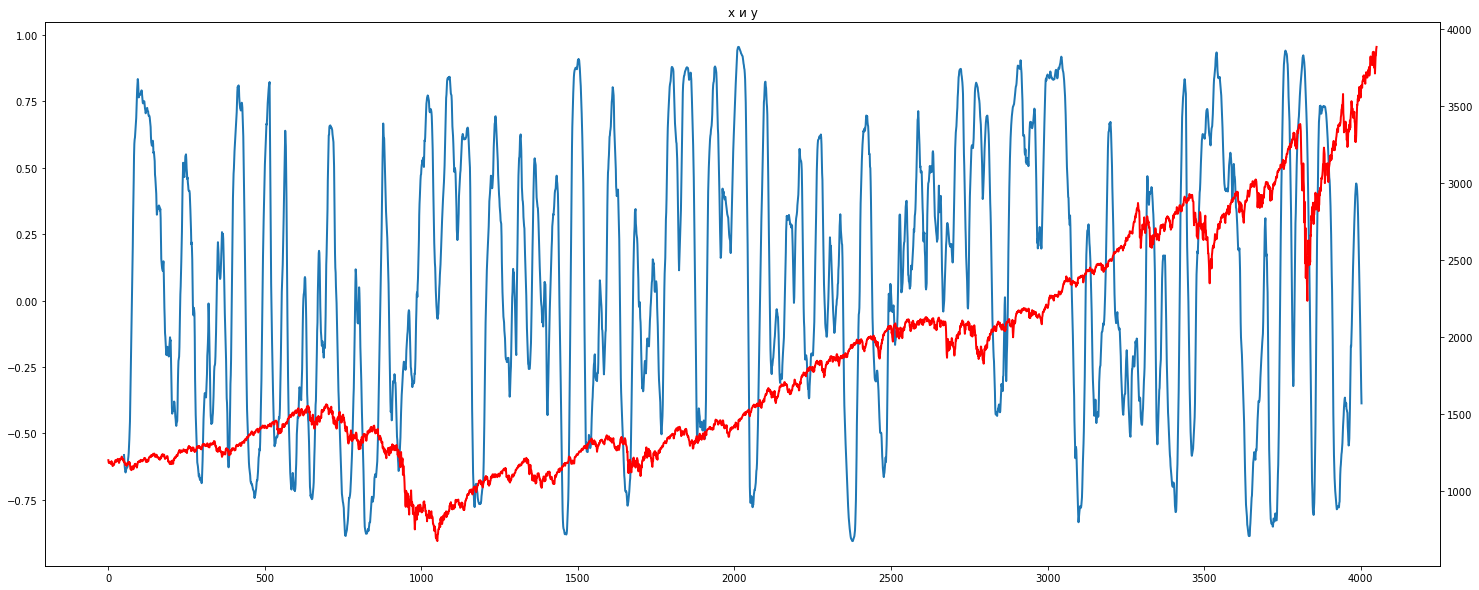

In [57]:
fig, ax = plt.subplots()
ax.set_title('x и y')
fig.set_size_inches(25, 10)

lns1 = ax.plot(df_['0'].rolling(window=50, center=True).mean()\
               .rolling(window=50, center=True).corr(df_.sp), linewidth=2, label='x')
ax2 = ax.twinx()
lns2 = ax2.plot(df_.sp, linewidth=2, c='r', label='y')